# Wine Quality

Authors: Vojtěch Zykán, Dominik Jachek

Period: LS 23/24

## Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score
from sklearn.preprocessing import label_binarize
import numpy as np
from itertools import cycle
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import matplotlib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV, GridSearchCV

## Data load

In [4]:
df_red = pd.read_csv("winequality-red.csv", sep=";")
df_white = pd.read_csv("winequality-white.csv", sep=";")

In [5]:
df_red["color"] = 0
df_white["color"] = 1

In [6]:
df = pd.concat([df_red, df_white])

## Description of the Dataset

In [7]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  color  
0      9.4        5      0  
1      9.8        5      0  
2      9.8        5      0  
3      9.8        6      0  
4      9.4        5      0

In [8]:
# Number of rows and columns
print("Rows count: ", df.shape[0])
print("Columns count: ", df.shape[1])

Rows count:  6497
Columns count:  13


In [9]:
# Number of unique values
df.nunique()

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
color                     2
dtype: int64

In [10]:
# Number of null values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


## Exploratory data analysis

In [12]:
# Basic statistics
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality        color  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     0.753886  
std       0.160787     0.148806     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     1.000000  
50%       3.210000     0.510000    10.300000     6.000000     1.000000  
75%       3.320000     0.600000    11.300000     6.000000     1.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'color'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

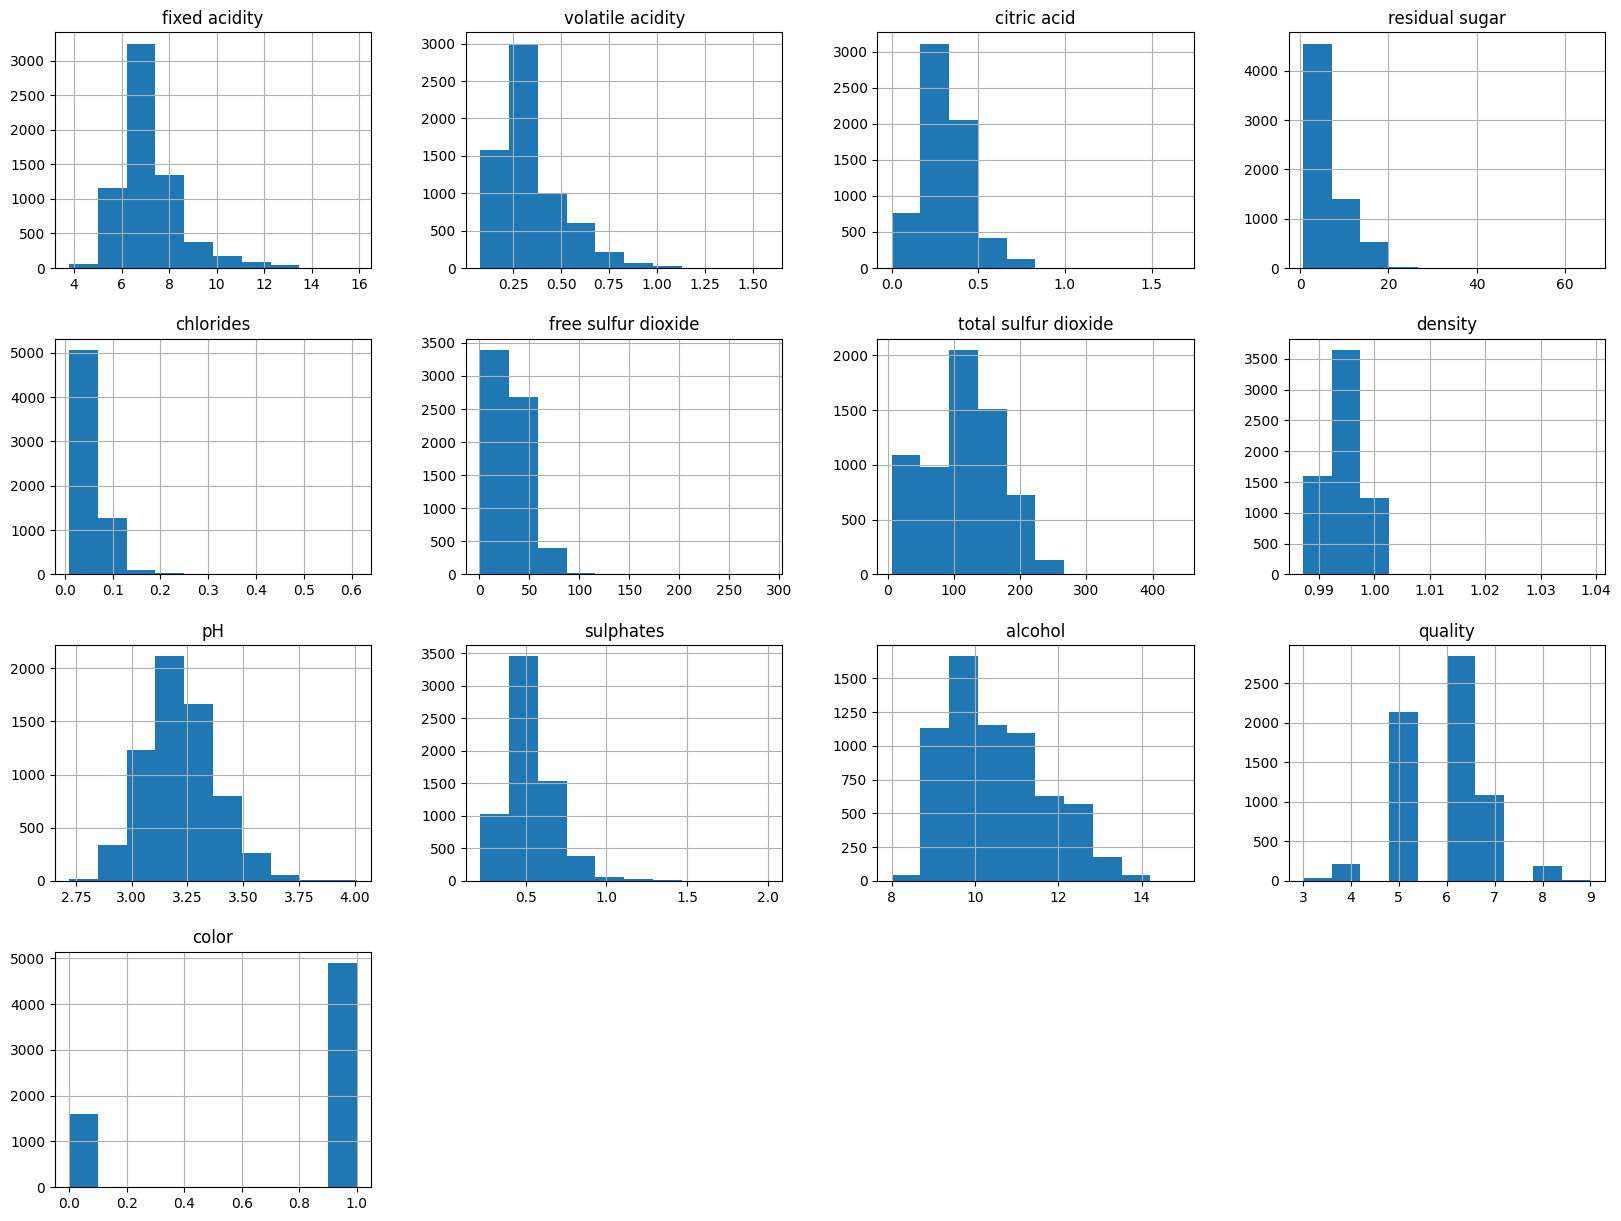

In [13]:
# Histograms for every column
df.hist(figsize = (20, 15))

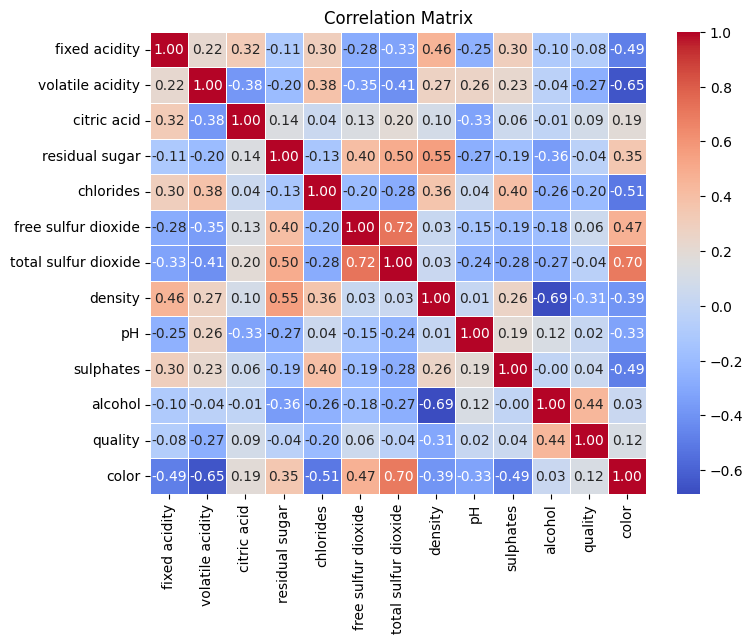

In [14]:
# Correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Data preprocessing

In [15]:
# Drop corellated features (> 0.6 or < -0.6)
df_preprocessed = df.drop(columns=["density", "total sulfur dioxide", "volatile acidity"])

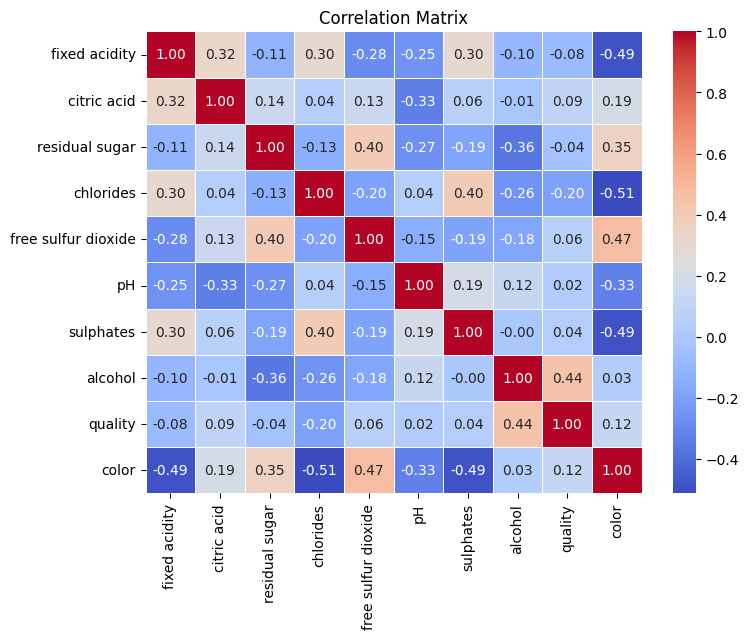

In [16]:
correlation_matrix = df_preprocessed.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [17]:
# New column
df_preprocessed["taste"] = df_preprocessed["residual sugar"] / df_preprocessed["fixed acidity"]
df_preprocessed = df_preprocessed.drop(columns = ["fixed acidity", "residual sugar"])
df_preprocessed.head()

citric acid  chlorides  free sulfur dioxide    pH  sulphates  alcohol  \
0         0.00      0.076                 11.0  3.51       0.56      9.4   
1         0.00      0.098                 25.0  3.20       0.68      9.8   
2         0.04      0.092                 15.0  3.26       0.65      9.8   
3         0.56      0.075                 17.0  3.16       0.58      9.8   
4         0.00      0.076                 11.0  3.51       0.56      9.4   

   quality  color     taste  
0        5      0  0.256757  
1        5      0  0.333333  
2        5      0  0.294872  
3        6      0  0.169643  
4        5      0  0.256757

In [18]:
# Remove rows where pH is below 2.75, because wine has usually pH between 2.8 and 3.3 (https://www.vinarskydum.cz/radce/postrehy/54-kyselinky-ve-vine-slava-jim)
df_preprocessed = df_preprocessed.query('pH >= 2.75') 

In [19]:
df_preprocessed

citric acid  chlorides  free sulfur dioxide    pH  sulphates  alcohol  \
0            0.00      0.076                 11.0  3.51       0.56      9.4   
1            0.00      0.098                 25.0  3.20       0.68      9.8   
2            0.04      0.092                 15.0  3.26       0.65      9.8   
3            0.56      0.075                 17.0  3.16       0.58      9.8   
4            0.00      0.076                 11.0  3.51       0.56      9.4   
...           ...        ...                  ...   ...        ...      ...   
4893         0.29      0.039                 24.0  3.27       0.50     11.2   
4894         0.36      0.047                 57.0  3.15       0.46      9.6   
4895         0.19      0.041                 30.0  2.99       0.46      9.4   
4896         0.30      0.022                 20.0  3.34       0.38     12.8   
4897         0.38      0.020                 22.0  3.26       0.32     11.8   

      quality  color     taste  
0           5      0  0.256757  
1           5      0  0.333333  
2           5      0  0.294872  
3           6      0  0.169643  
4           5      0  0.256757  
...       ...    ...       ...  
4893        6      1  0.258065  
4894        5      1  1.212121  
4895        6      1  0.184615  
4896        7      1  0.200000  
4897        6      1  0.133333  

[6494 rows x 9 columns]

In [64]:
# Merging classes due to imbalance
mapping = {3: 'poor', 4: 'poor', 5: 'poor', 6: 'good', 7: 'excellent', 8: 'excellent', 9: 'excellent'}
df_preprocessed['quality'] = df_preprocessed['quality'].replace(mapping)


Text(0.5, 0.98, 'Quality of Wine')

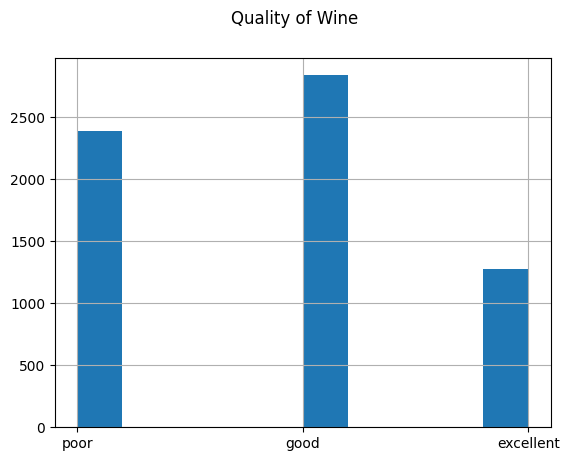

In [65]:
df_preprocessed['quality'].hist(label='Quality')
plt.suptitle("Quality of Wine")

In [66]:
# Split dataframe to features and target
X = df_preprocessed.drop(columns = "quality")
y = df_preprocessed["quality"]

y = y.astype(str)

In [67]:
print(X.head())
print(y.head())

   citric acid  chlorides  free sulfur dioxide    pH  sulphates  alcohol  \
0         0.00      0.076                 11.0  3.51       0.56      9.4   
1         0.00      0.098                 25.0  3.20       0.68      9.8   
2         0.04      0.092                 15.0  3.26       0.65      9.8   
3         0.56      0.075                 17.0  3.16       0.58      9.8   
4         0.00      0.076                 11.0  3.51       0.56      9.4   

   color     taste  
0      0  0.256757  
1      0  0.333333  
2      0  0.294872  
3      0  0.169643  
4      0  0.256757  
0    poor
1    poor
2    poor
3    good
4    poor
Name: quality, dtype: object


# Modeling and Evaluation

## Decision Tree

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [88]:
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=20)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [89]:
y_pred = decision_tree.predict(X_test)
y_pred_train = decision_tree.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.9932627526467758

In [90]:
confusion_matrix(y_test, y_pred)

array([[150,  85,  20],
       [ 68, 362, 137],
       [ 21, 107, 349]], dtype=int64)

In [91]:
acc_dt = accuracy_score(y_test, y_pred)
print(acc_dt)

0.6628175519630485


In [92]:
recall_poor_dt = recall_score(y_test, y_pred, labels=["poor"], average="macro")
recall_good_dt = recall_score(y_test, y_pred, labels=["good"], average="macro")
recall_excellent_dt = recall_score(y_test, y_pred, labels=["excellent"], average="macro")

print("Recall for class poor:", recall_poor_dt)
print("Recall for class good:", recall_good_dt)
print("Recall for class excellent:", recall_excellent_dt)


Recall for class poor: 0.7316561844863732
Recall for class good: 0.6384479717813051
Recall for class excellent: 0.5882352941176471


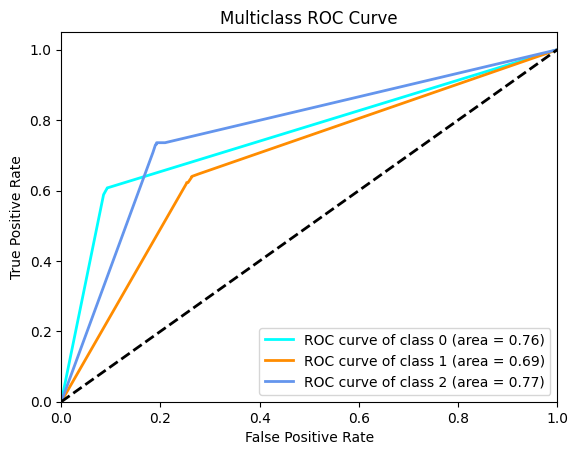

In [93]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

y_score = decision_tree.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_train))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(len(np.unique(y_train))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [94]:
auc_dt = roc_auc_score(y_test, decision_tree.predict_proba(X_test), multi_class='ovr')
print(auc_dt)

0.7392255600795702


## Random Forest

In [95]:
random_forest = RandomForestClassifier(random_state=42, max_depth=16, n_estimators=200)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=200, random_state=42)

In [96]:
y_pred = random_forest.predict(X_test)
y_pred_train = random_forest.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.997497593840231

In [97]:
confusion_matrix(y_test, y_pred)

array([[156,  88,  11],
       [ 42, 423, 102],
       [  4, 104, 369]], dtype=int64)

In [98]:
acc_rf = accuracy_score(y_test, y_pred)
print(acc_rf)

0.7297921478060047


In [99]:
recall_poor_rf = recall_score(y_test, y_pred, labels=["poor"], average="macro")
recall_good_rf = recall_score(y_test, y_pred, labels=["good"], average="macro")
recall_excellent_rf = recall_score(y_test, y_pred, labels=["excellent"], average="macro")

print("Recall for class poor:", recall_poor_rf)
print("Recall for class good:", recall_good_rf)
print("Recall for class excellent:", recall_excellent_rf)

Recall for class poor: 0.7735849056603774
Recall for class good: 0.746031746031746
Recall for class excellent: 0.611764705882353


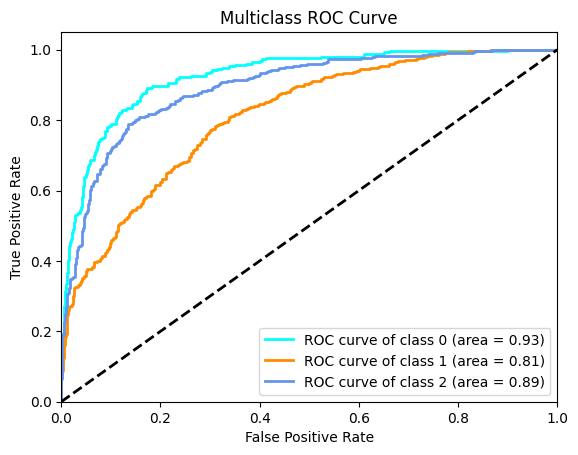

In [100]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

y_score = random_forest.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_train))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(len(np.unique(y_train))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [101]:
auc_rf = roc_auc_score(y_test, random_forest.predict_proba(X_test), multi_class='ovr')
print(auc_rf)

0.8771149523953087


In [105]:
#Models score comparison
print("Accuracy difference:", acc_rf - acc_dt)
print("Recall poor difference:", recall_poor_rf-recall_poor_dt)
print("Recall good difference:", recall_good_rf - recall_good_dt)
print("Recall excellent difference:", recall_excellent_rf - recall_excellent_dt)
print("AUC difference:", auc_rf-auc_dt)

Accuracy difference: 0.06697459584295617
Recall poor difference: 0.04192872117400426
Recall good difference: 0.10758377425044097
Recall excellent difference: 0.02352941176470591
AUC difference: 0.1378893923157385


Better is random forest model

We will perform hyperparameter tuning on better model

We used RandomizedSearchCV for saving time while model is training. We are sure that with GridSearchCV model would perform better

### Cross-Validation

In [106]:
kf = KFold(n_splits = 6, shuffle=True, random_state=42)

cv_scores = cross_val_score(random_forest, X_train, y_train, cv=kf)
print(cv_scores)

[0.71939954 0.69053118 0.69745958 0.67667436 0.69745958 0.68439306]


In [107]:
kf = KFold(n_splits = 6, shuffle=True, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
params = {'n_estimators': [50, 100, 200],
    'max_depth': [10, 13, 15, 16, 17],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']}

random_forest_CV = RandomizedSearchCV(random_forest, params, cv=kf, random_state=42)

random_forest_CV.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=6, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 13, 15, 16, 17],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42)

In [108]:
y_pred = random_forest_CV.predict(X_test)
y_pred_train = random_forest_CV.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.9921077959576516

In [109]:
confusion_matrix(y_test, y_pred)

array([[155,  86,  14],
       [ 40, 421, 106],
       [  3, 112, 362]], dtype=int64)

In [128]:
acc_cv = accuracy_score(y_test, y_pred)
print(acc_cv)

0.7220939183987682


In [129]:
recall_poor_cv = recall_score(y_test, y_pred, labels=["poor"], average="macro")
recall_good_cv = recall_score(y_test, y_pred, labels=["good"], average="macro")
recall_excellent_cv = recall_score(y_test, y_pred, labels=["excellent"], average="macro")

print("Recall for class poor:", recall_poor_cv)
print("Recall for class good:", recall_good_cv)
print("Recall for class excellent:", recall_excellent_cv)

Recall for class poor: 0.7589098532494759
Recall for class good: 0.7425044091710759
Recall for class excellent: 0.6078431372549019


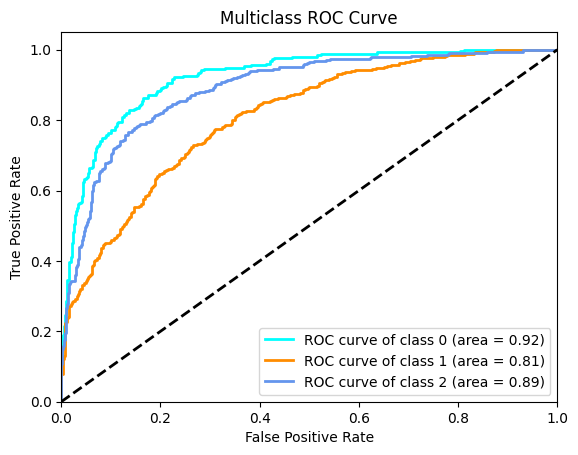

In [130]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

y_score = random_forest_CV.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_train))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(len(np.unique(y_train))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [131]:
auc_cv = roc_auc_score(y_test, random_forest_CV.predict_proba(X_test), multi_class='ovr')
print(auc_cv)

0.873955471755618


In [132]:
unique_labels = np.unique(np.concatenate((y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=unique_labels, yticklabels=unique_labels, cmap='Blues')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

plt.show()

In [133]:
#Models score comparison
print("Accuracy difference:", acc_rf - acc_cv)
print("Recall poor difference:", recall_poor_rf-recall_poor_cv)
print("Recall good difference:", recall_good_rf - recall_good_cv)
print("Recall excellent difference:", recall_excellent_rf - recall_excellent_cv)
print("AUC difference:", auc_rf-auc_cv)

Accuracy difference: 0.007698229407236412
Recall poor difference: 0.014675052410901501
Recall good difference: 0.003527336860670194
Recall excellent difference: 0.0039215686274510775
AUC difference: 0.003159480639690626


In [134]:
#Performance of best model summary
print(acc_rf)
print(recall_poor_rf)
print(recall_good_rf)
print(recall_excellent_rf)
print(auc_rf)

0.7297921478060047
0.7735849056603774
0.746031746031746
0.611764705882353
0.8771149523953087


Best model is still Random forest without cross-validation

But as we have mentioned before we are almost sure that with GridSearchCV model would be better

Overall performance of best model is not bad, but model is not performing well when predicting execellent wines